In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import re
import joblib

In [2]:
# To display output completely
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
os.listdir()

['.ipynb_checkpoints',
 'Assignment - Bank Customer Deposit Prediction.pdf',
 'Bank Subscription_model',
 'Bank Subscription_model.pkl',
 'Bank Subscription_model.sav',
 'bank-full.csv',
 'Bank_Full_Cleaned.csv',
 'Bank_Full_testPrediction.csv',
 'dummies_tranformation.sav',
 'Yugen-Bank Subscription.ipynb']

In [4]:
data = pd.read_csv("bank-full.csv")

In [5]:
data.head()

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."


In [6]:
data.shape

(45211, 1)

In [7]:
Columns = data.columns[0].split(';')
Columns

['age',
 '"job"',
 '"marital"',
 '"education"',
 '"default"',
 '"balance"',
 '"housing"',
 '"loan"',
 '"contact"',
 '"day"',
 '"month"',
 '"duration"',
 '"campaign"',
 '"pdays"',
 '"previous"',
 '"poutcome"',
 '"y"']

In [8]:
Columns = [re.sub('"', '',x) for x in Columns]
Columns

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [9]:
dataList=data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].tolist()

In [10]:
dataList[0]

'58;"management";"married";"tertiary";"no";2143;"yes";"no";"unknown";5;"may";261;1;-1;0;"unknown";"no"'

In [11]:
# cleaning the dataset properly and create a new Dataframe
Final_data = []
for x in dataList:
    x = x.split(';')
    data = [re.sub('"', '',value) for value in x]
    Final_data.append(data)
        

In [12]:
Final_data[0]

['58',
 'management',
 'married',
 'tertiary',
 'no',
 '2143',
 'yes',
 'no',
 'unknown',
 '5',
 'may',
 '261',
 '1',
 '-1',
 '0',
 'unknown',
 'no']

In [13]:
data_cleaned = pd.DataFrame(Final_data, columns= Columns)

In [14]:
data_cleaned.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [15]:
#data_cleaned.to_csv('Bank_Full_Cleaned.csv', index=False)

#### Reading the New Dataset

In [16]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  object
 10  month      45211 non-null  object
 11  duration   45211 non-null  object
 12  campaign   45211 non-null  object
 13  pdays      45211 non-null  object
 14  previous   45211 non-null  object
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: object(17)
memory usage: 5.9+ MB


In [17]:
os.listdir()

['.ipynb_checkpoints',
 'Assignment - Bank Customer Deposit Prediction.pdf',
 'Bank Subscription_model',
 'Bank Subscription_model.pkl',
 'Bank Subscription_model.sav',
 'bank-full.csv',
 'Bank_Full_Cleaned.csv',
 'Bank_Full_testPrediction.csv',
 'dummies_tranformation.sav',
 'Yugen-Bank Subscription.ipynb']

In [18]:
NewData = pd.read_csv('Bank_Full_Cleaned.csv')

In [19]:
NewData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [20]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#### Converting binary columns to 0 and 1

In [21]:
NewData['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

In [22]:
NewData['default'] = NewData['default'].apply(lambda x: 0 if x =='no' else 1)
NewData['default'].head()

0    0
1    0
2    0
3    0
4    0
Name: default, dtype: int64

In [23]:
NewData['housing'] = NewData['housing'].apply(lambda x: 0 if x =='no' else 1)
NewData['housing'].head()

0    1
1    1
2    1
3    1
4    0
Name: housing, dtype: int64

In [24]:
NewData['loan'] = NewData['loan'].apply(lambda x: 0 if x =='no' else 1)
NewData['loan'].head()

0    0
1    0
2    1
3    0
4    0
Name: loan, dtype: int64

In [25]:
NewData['y'] = NewData['y'].apply(lambda x: 0 if x =='no' else 1)
NewData['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

In [26]:
NewData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [27]:
NewData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  int64 
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  int64 
 7   loan       45211 non-null  int64 
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(11), object(6)
memory usage: 5.9+ MB


### Exploratory Data Analysis

###### Generating data quality report

In [28]:
def get_cat (col,data):
    dtype = data[col].dtype
    count= data[col].shape[0]
    missing = data[col].isnull().sum()
    unique = len(data[col].unique())
    zeros = data[data[col]== 0].shape[0]
    min = "NA"
    d1 = "NA"
    d2 = "NA"
    d3 = "NA"
    d4 = "NA"
    d5 = "NA"
    d6 = "NA"
    d7 = "NA"
    d8 = "NA"
    d9 = "NA"
    mean = "NA"
    max = "NA"
    return (col, dtype, count, missing, unique, zeros, min, d1, d2, d3, d4, d5, d6, d7, d8, d9, mean, max)
def get_num (col,data):
    dtype = data[col].dtype
    count= data[col].shape[0]
    missing = data[col].isnull().sum()
    unique = len(data[col].unique())
    zeros = data[data[col]== 0].shape[0]
    min = data[col].min()
    d1 = data[col].quantile(0.1)
    d2 = data[col].quantile(0.2)
    d3 = data[col].quantile(0.3)
    d4 = data[col].quantile(0.4)
    d5 = data[col].quantile(0.5)
    d6 = data[col].quantile(0.6)
    d7 = data[col].quantile(0.7)
    d8 = data[col].quantile(0.8)
    d9 = data[col].quantile(0.9)
    mean = data[col].mean()
    max = data[col].max()
    return (col, dtype, count, missing, unique, zeros, min, d1, d2, d3, d4, d5, d6, d7, d8, d9, mean, max)

In [29]:
def get_report(data):
    col_cat= data.dtypes[data.dtypes=='object'].index
    col_num= data.dtypes[data.dtypes!='object'].index
    num = []
    cat = []
    for cols in col_num:
        num.append(get_num(cols,data))
    for cols in col_cat:
        cat.append(get_cat(cols, data))
    data_num = pd.DataFrame(num)        
    data_cat = pd.DataFrame(cat)    
    result = pd.concat([data_num,data_cat], axis=0)
    result.columns= ['col', 'dtype','count', 'missing', 'unique', 'zeros', 'min', 'd1', 'd2', 'd3', 'd4', 'd5', 'd6', 'd7', 'd8', 'd9', 'mean', 'max']
    result= result.reset_index().drop('index', axis=1)
    return result

In [30]:
get_report(NewData)

,col,dtype,count,missing,unique,zeros,min,d1,d2,d3,d4,d5,d6,d7,d8,d9,mean,max
0,age,int64,45211,0,77,0,18,29,32,34,36,39,42,46,51,56,40.9362,95
1,default,int64,45211,0,2,44396,0,0,0,0,0,0,0,0,0,0,0.0180266,1
2,balance,int64,45211,0,7168,3514,-8019,0,22,131,272,448,701,1126,1859,3574,1362.27,102127
3,housing,int64,45211,0,2,20081,0,0,0,0,0,1,1,1,1,1,0.555838,1
4,loan,int64,45211,0,2,37967,0,0,0,0,0,0,0,0,0,1,0.160226,1
5,day,int64,45211,0,31,0,1,5,7,10,13,16,18,20,24,28,15.8064,31
6,duration,int64,45211,0,1573,3,0,58,89,117,147,180,223,280,368,548,258.163,4918
7,campaign,int64,45211,0,48,0,1,1,1,1,2,2,2,3,4,5,2.76384,63
8,pdays,int64,45211,0,559,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,185,40.1978,871
9,previous,int64,45211,0,41,36954,0,0,0,0,0,0,0,0,0,2,0.580323,275


In [31]:
# analysing the 14 unique variables in job
NewData.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'mgmt', 'retired', 'admin', 'admin.', 'services',
       'self-employed', 'unemployed', 'housemaid', 'student'],
      dtype=object)

In [32]:
# admin is repeated
NewData['job'].str.replace('.','').unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'mgmt', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [33]:
NewData['job'] = NewData['job'].str.replace('.','')

In [34]:
NewData.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'mgmt', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

###### Analysing each variables

In [35]:
NewData.age.describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

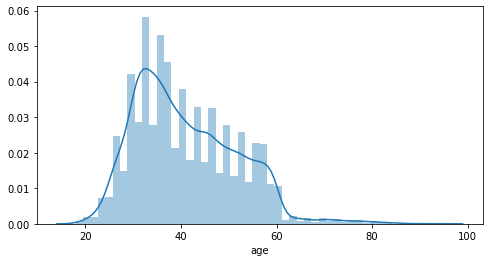

In [36]:
plt.figure(figsize=(8,4))
sns.distplot(NewData.age)

{'whiskers': [<matplotlib.lines.Line2D at 0x206cb2d42c8>,
 'caps': [<matplotlib.lines.Line2D at 0x206cb35af88>,
 'boxes': [<matplotlib.lines.Line2D at 0x206cb3600c8>],
 'medians': [<matplotlib.lines.Line2D at 0x206cb351c48>],
 'fliers': [<matplotlib.lines.Line2D at 0x206cb291508>],
 'means': []}

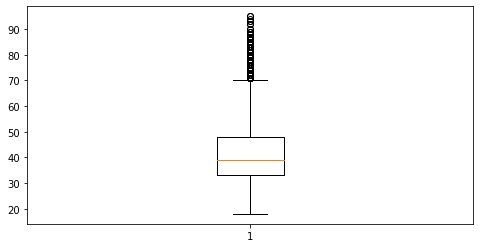

In [37]:
plt.figure(figsize=(8,4))
plt.boxplot(NewData.age)

###### Age looks good it is almost normal

In [38]:
NewData.default.value_counts()

0    44396
1      815
Name: default, dtype: int64

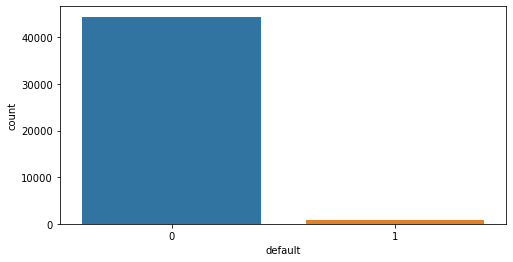

In [39]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.default)

##### Very few people are credited in default

In [40]:
NewData.balance.describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

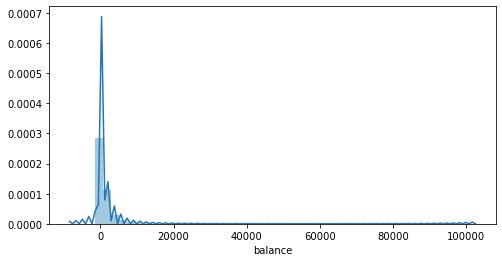

In [41]:
plt.figure(figsize=(8,4))
sns.distplot(NewData.balance)

{'whiskers': [<matplotlib.lines.Line2D at 0x206cc262b48>,
 'caps': [<matplotlib.lines.Line2D at 0x206cc266948>,
 'boxes': [<matplotlib.lines.Line2D at 0x206cc262308>],
 'medians': [<matplotlib.lines.Line2D at 0x206cc26c7c8>],
 'fliers': [<matplotlib.lines.Line2D at 0x206cc26cec8>],
 'means': []}

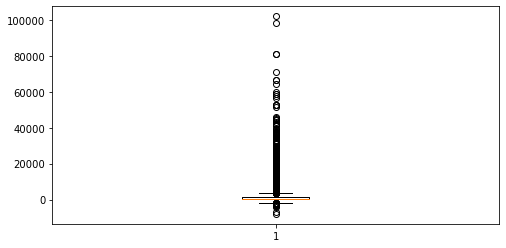

In [42]:
plt.figure(figsize=(8,4))
plt.boxplot(NewData.balance)

##### Bank balance of 102127 euros is possible.

In [43]:
NewData.housing.value_counts()

1    25130
0    20081
Name: housing, dtype: int64

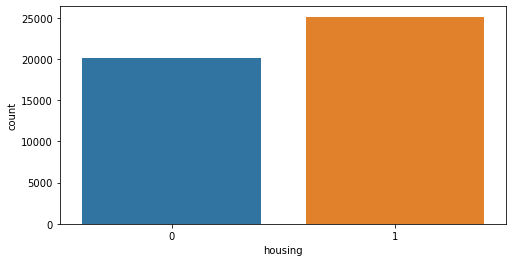

In [44]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.housing)

In [45]:
NewData.loan.value_counts()

0    37967
1     7244
Name: loan, dtype: int64

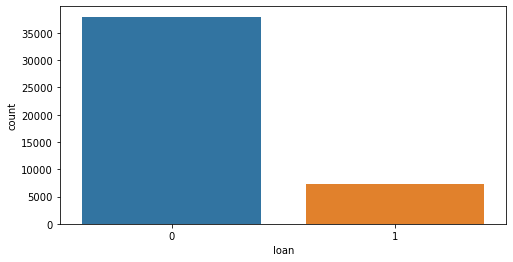

In [46]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.loan)

In [47]:
NewData.day.describe()

count    45211.000000
mean        15.806419
std          8.322476
min          1.000000
25%          8.000000
50%         16.000000
75%         21.000000
max         31.000000
Name: day, dtype: float64

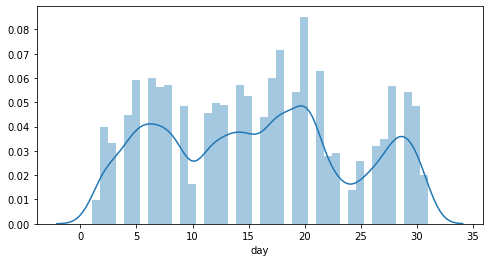

In [48]:
plt.figure(figsize=(8,4))
sns.distplot(NewData.day)

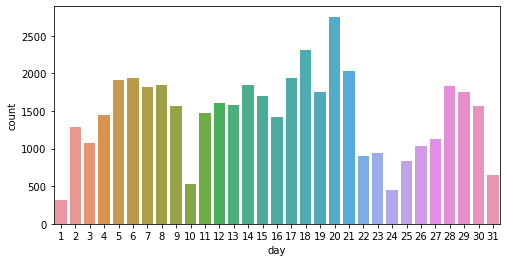

In [49]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.day)

In [50]:
NewData.duration.describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

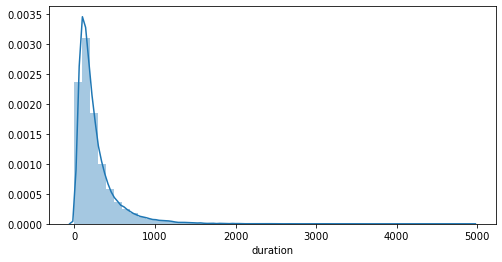

In [51]:
plt.figure(figsize=(8,4))
sns.distplot(NewData.duration)

{'whiskers': [<matplotlib.lines.Line2D at 0x206cce19988>,
 'caps': [<matplotlib.lines.Line2D at 0x206cce1b788>,
 'boxes': [<matplotlib.lines.Line2D at 0x206cce19148>],
 'medians': [<matplotlib.lines.Line2D at 0x206cce1bfc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x206cce22d08>],
 'means': []}

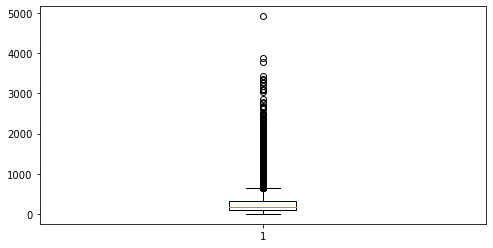

In [52]:
plt.figure(figsize=(8,4))
plt.boxplot(NewData.duration)

##### Outlier is not an improbable value as i don't have the business person to contact with leaving as it is.

In [53]:
NewData.campaign.describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

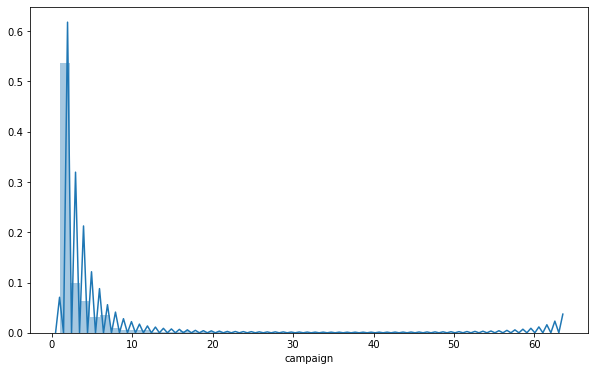

In [54]:
plt.figure(figsize=(10,6))
sns.distplot(NewData.campaign)

{'whiskers': [<matplotlib.lines.Line2D at 0x206cc29ebc8>,
 'caps': [<matplotlib.lines.Line2D at 0x206cc286a88>,
 'boxes': [<matplotlib.lines.Line2D at 0x206cc29ea08>],
 'medians': [<matplotlib.lines.Line2D at 0x206cc21c808>],
 'fliers': [<matplotlib.lines.Line2D at 0x206cc7b8908>],
 'means': []}

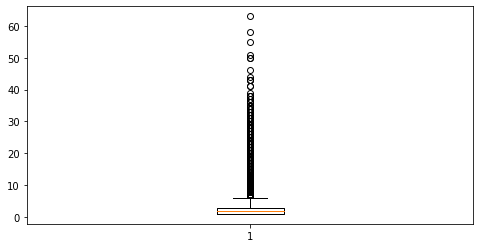

In [55]:
plt.figure(figsize=(8,4))
plt.boxplot(NewData.campaign)

In [56]:
NewData.pdays.describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

C:\Users\Rudhra\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


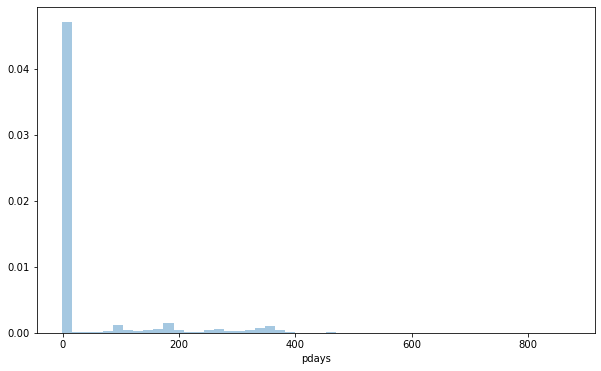

In [57]:
plt.figure(figsize=(10,6))
sns.distplot(NewData.pdays)

In [58]:
NewData.previous.describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

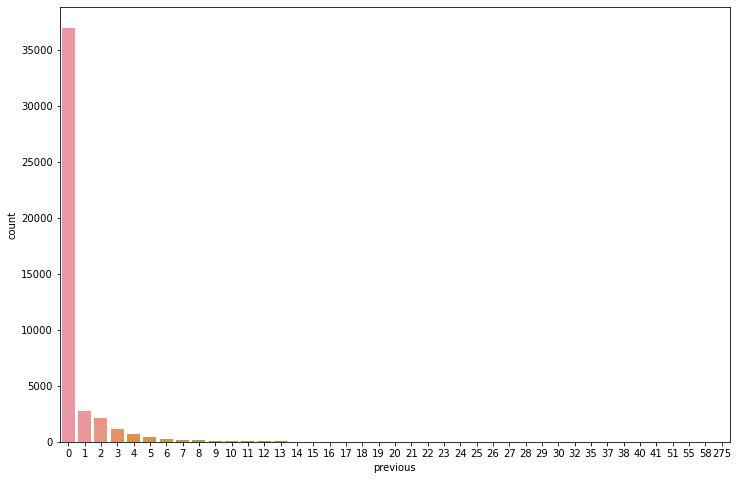

In [59]:
plt.figure(figsize=(12,8))
sns.countplot(NewData.previous)

##### 275 can be a outlier but not an impropable one.

In [60]:
NewData.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

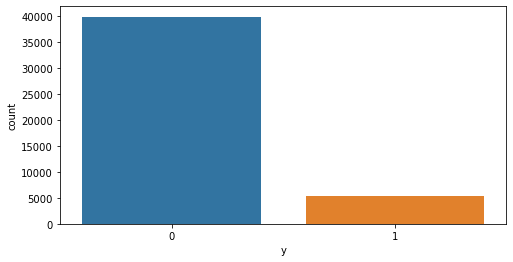

In [61]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.y)

##### The data is very imbalenced 

##### Analysing catagorical variables

In [62]:
NewData.job.value_counts()

blue-collar      9732
management       9456
technician       7597
admin            5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
mgmt                2
Name: job, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

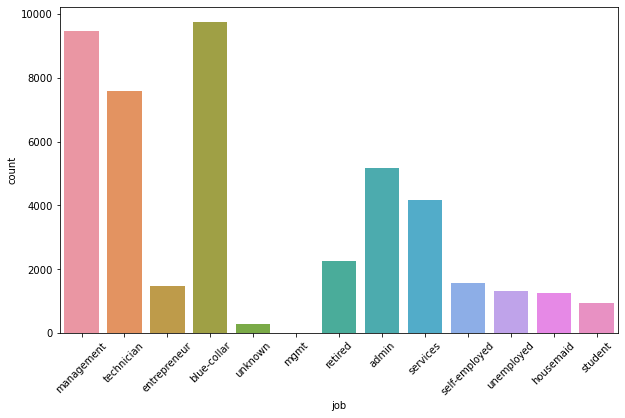

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(NewData.job)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

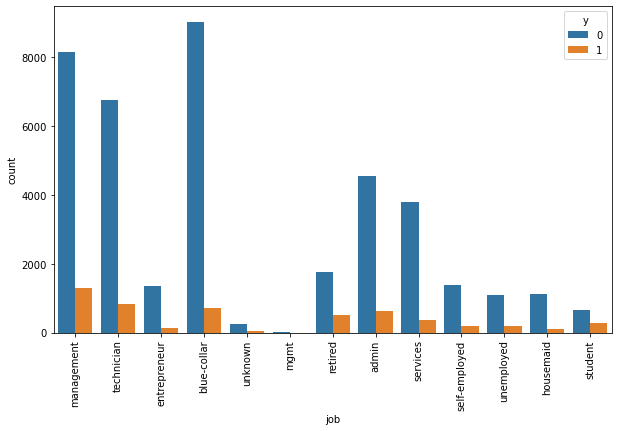

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(x='job', hue='y',data=NewData)
plt.xticks(rotation=90)

##### Blue-collar people are highest non subscribers and Management people are the highest subscribers

In [65]:
NewData.marital.value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

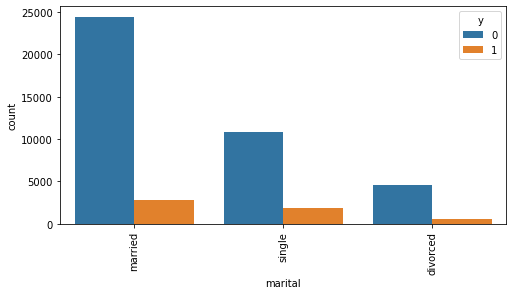

In [66]:
plt.figure(figsize=(8,4))
sns.countplot(x='marital', hue='y',data=NewData)
plt.xticks(rotation=90)

In [67]:
NewData.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

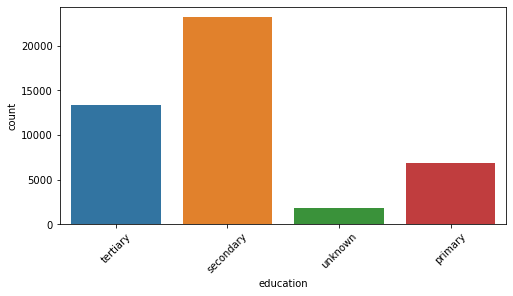

In [68]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.education)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

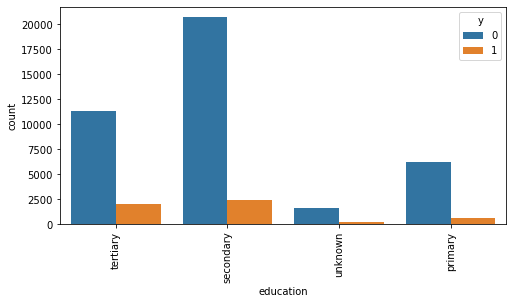

In [69]:
plt.figure(figsize=(8,4))
sns.countplot(x='education', hue='y',data=NewData)
plt.xticks(rotation=90)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

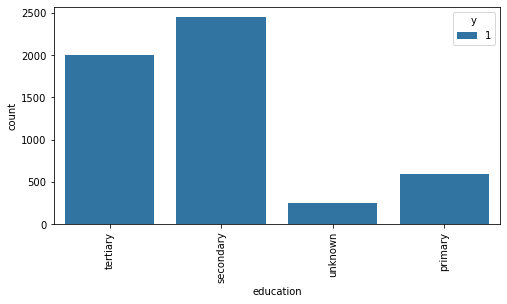

In [70]:
plt.figure(figsize=(8,4))
sns.countplot(x='education', hue='y',data=NewData, hue_order=[1])
plt.xticks(rotation=90)

##### Secondary education people are the highest subscribers

In [71]:
NewData.contact.value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

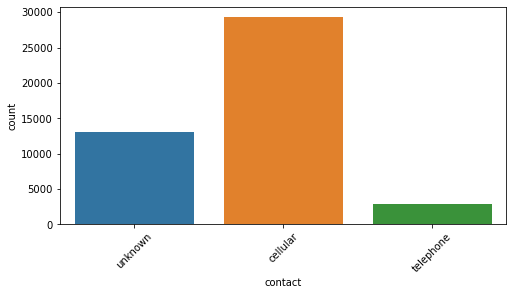

In [72]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.contact)
plt.xticks(rotation=45)

(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

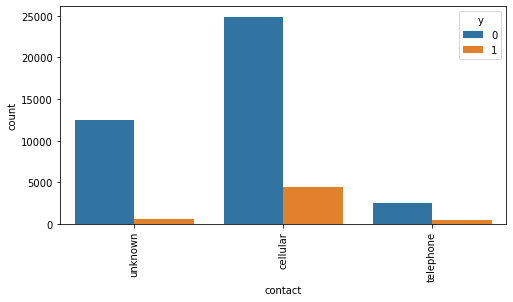

In [73]:
plt.figure(figsize=(8,4))
sns.countplot(x='contact', hue='y',data=NewData)
plt.xticks(rotation=90)

In [74]:
NewData.month.value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

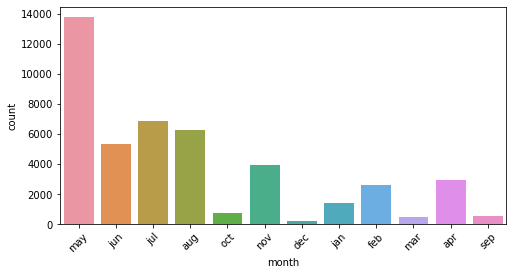

In [75]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.month)
plt.xticks(rotation=45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

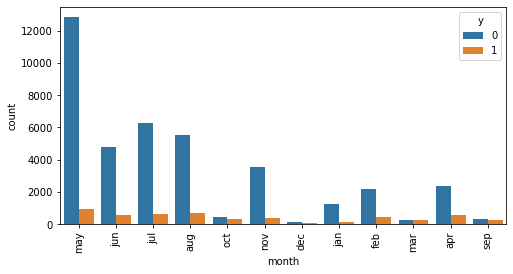

In [76]:
plt.figure(figsize=(8,4))
sns.countplot(x='month', hue='y',data=NewData)
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

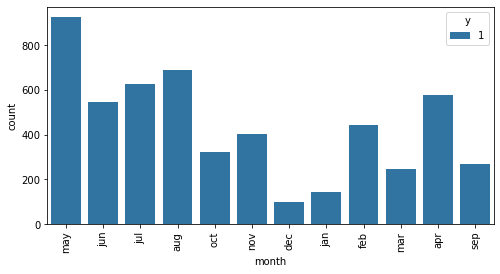

In [77]:
plt.figure(figsize=(8,4))
sns.countplot(x='month', hue='y',data=NewData, hue_order=[1])
plt.xticks(rotation=90)

In [78]:
NewData.poutcome.value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

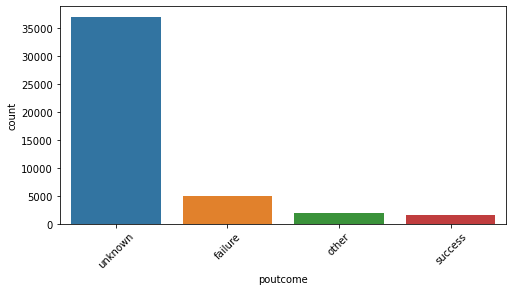

In [79]:
plt.figure(figsize=(8,4))
sns.countplot(NewData.poutcome)
plt.xticks(rotation=45)

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

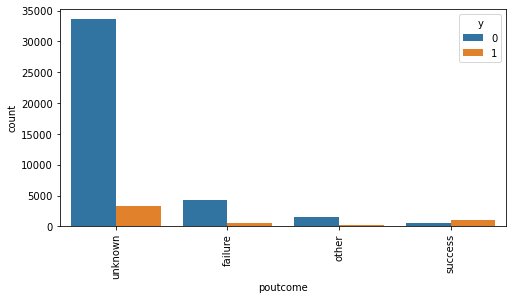

In [80]:
plt.figure(figsize=(8,4))
sns.countplot(x='poutcome', hue='y',data=NewData)
plt.xticks(rotation=90)

#### Correlation Analysis

In [81]:
NewData.corr()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,y
age,1.000000,-0.017879,0.097783,-0.185513,-0.015655,-0.009120,-0.004648,0.004760,-0.023758,0.001288,0.025155
default,-0.017879,1.000000,-0.066745,-0.006025,0.077234,0.009424,-0.010021,0.016822,-0.029979,-0.018329,-0.022419
balance,0.097783,-0.066745,1.000000,-0.068768,-0.084350,0.004503,0.021560,-0.014578,0.003435,0.016674,0.052838
housing,-0.185513,-0.006025,-0.068768,1.000000,0.041323,-0.027982,0.005075,-0.023599,0.124178,0.037076,-0.139173
loan,-0.015655,0.077234,-0.084350,0.041323,1.000000,0.011370,-0.012412,0.009980,-0.022754,-0.011043,-0.068185
day,-0.009120,0.009424,0.004503,-0.027982,0.011370,1.000000,-0.030206,0.162490,-0.093044,-0.051710,-0.028348
duration,-0.004648,-0.010021,0.021560,0.005075,-0.012412,-0.030206,1.000000,-0.084570,-0.001565,0.001203,0.394521
campaign,0.004760,0.016822,-0.014578,-0.023599,0.009980,0.162490,-0.084570,1.000000,-0.088628,-0.032855,-0.073172
pdays,-0.023758,-0.029979,0.003435,0.124178,-0.022754,-0.093044,-0.001565,-0.088628,1.000000,0.454820,0.103621
previous,0.001288,-0.018329,0.016674,0.037076,-0.011043,-0.051710,0.001203,-0.032855,0.454820,1.000000,0.093236


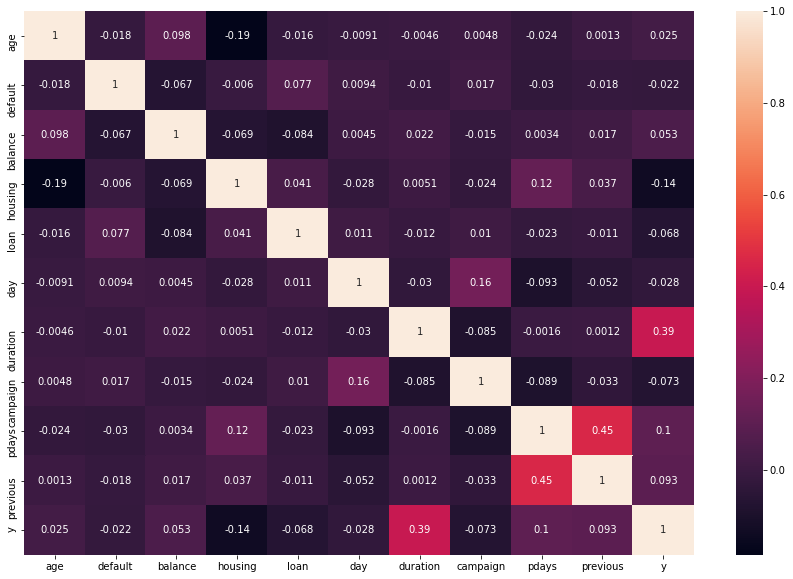

In [82]:
plt.figure(figsize=(15,10))
corr = NewData.corr()
sns.heatmap(corr,annot=True)

#### There is northing much correlation between the variables

#### Preparing Training and Test set

In [83]:
NewData.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


In [84]:
X = NewData.drop(['y'],axis=1)

In [85]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown


In [86]:
X = pd.get_dummies(X)

In [87]:
X.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_mgmt,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [88]:
# Saving the dummies fit for transformation
#filename = 'dummies_tranformation.sav'
#joblib.dump(X, filename)

In [89]:
### Testing the saved file
#loaded_dummy = joblib.load(filename)
#loaded_dummy.head()

In [90]:
y = NewData['y']

In [91]:
X.shape

(45211, 49)

In [92]:
y.shape

(45211,)

#### Train and test split

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=50)

In [94]:
X_train.shape

(29387, 49)

In [95]:
X_test.shape

(15824, 49)

In [96]:
y_train.shape

(29387,)

In [97]:
y_test.shape

(15824,)

In [98]:
#X_test.to_csv('Bank_Full_testPrediction.csv', index=False)

### Treating the imbalanced train data set

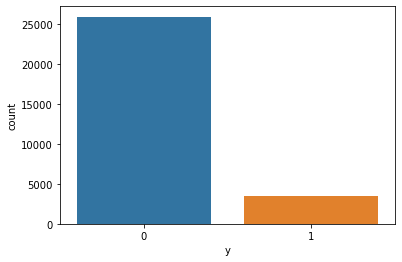

In [99]:
sns.countplot(y_train)

In [100]:
from imblearn.over_sampling import SMOTE

In [101]:
sm = SMOTE(random_state=50)

In [102]:
X_train, y_train = sm.fit_sample(X_train, y_train)

In [103]:
X_train.shape

(51824, 49)

In [104]:
y_train.shape

(51824,)

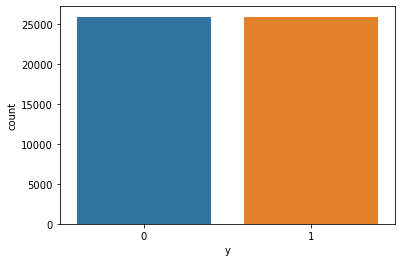

In [105]:
sns.countplot(y_train)

##### Training data set is well balanced

##### Building Models

In [106]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

In [107]:
clf = XGBClassifier()

In [108]:
clf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
# Saving the modal for deployment
Modal_filename = 'Bank Subscription_model.pkl'
joblib.dump(clf, Modal_filename)

['Bank Subscription_model.pkl']

In [110]:
pred = clf.predict(X_test)
pred[1:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [111]:
f1_score(y_test, pred)

0.5834279228149829

In [112]:
accuracy_score(y_test, pred)

0.9072295247724975

In [113]:
precision_score(y_test, pred)

0.6011695906432749

In [114]:
recall_score(y_test, pred)

0.5667034178610805

In [115]:
### Testing the modal file
modal = joblib.load(Modal_filename)
pred = modal.predict(X_test)
pred[1:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

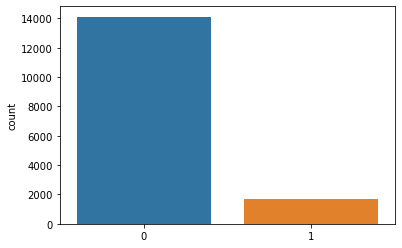

In [116]:
sns.countplot(pred)

##### does fair amount of job